<h1>Introduction</h1>

In this research, we will analyze the stats of players in Fifa. And predicting the preferred position of the players. That position is the place the player will perform the best.

Firstly, we import the neccesary libraries

In [138]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pd.set_option('mode.chained_assignment', None)

In [139]:
df = pd.read_csv('CompleteDataset.csv')
df

C:\Users\jorri\AppData\Local\Temp\ipykernel_81172\3660264320.py:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CompleteDataset.csv')


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0


The dataset contains different players' information and performance in different positions. We use specific skills of the players to predict the position the player will perform the best.

We limit this analysis to the following skill variables:

- Sprint speed
- Aggression
- Balance
- Positioning
- Dribbling
- Long Shots
- Shot power

These variables are chosen to represent different positions. For instance, shot power for the attackers and positioning for defenders. Also, position specific stats are left out as goalkeeper stats.

<h1>Data Cleaning</h1>

Firstly we drop the na values.

Many columns are in object values because some values are a subtraction or sum of the actual stat, like (70+9). For this reason, we cannot use these stats. Currently, we do not understand what it means. It can mean that the stat 79 is, but it can also be a mistake. Therefore, the best option is to leave those results out.

In [140]:
df.dropna(inplace=True)

columns = ['Aggression','Acceleration','Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling','Finishing','Free kick accuracy','GK diving','Aggression','GK kicking','GK positioning','GK reflexes','Heading accuracy','Interceptions','Jumping','Long passing','Long shots','Marking','Penalties','Positioning','Reactions','Short passing','Shot power','Sliding tackle','Sprint speed','Stamina','Standing tackle','Strength','Vision','Volleys']

for item in columns:
    df[item] = df[item].astype('string')
    df = df[(df[item].str.len()) <= 2]
    df[item] = df[item].astype(int)


df['Preferred Positions'] = df['Preferred Positions'].astype('string')

Some players have multiple positions. We want to split them so we can individually analyze them per position. Then we change the position into numerical values so we can use them later for the prediction.

In [141]:
df['Preferred Positions'] = df['Preferred Positions'].str.split().str.get(0)

df['Preferred Positions']

pos_dict = {'CAM' : 0,'CB': 1,'CDM': 2,'CF': 3,'CM': 4,'LAM': 5,'LB': 6,'LCB': 7,'LCM': 8,'LDM': 9,'LF': 10,'LM': 11,'LS': 12,'LW': 13,'LWB': 14,'RAM': 15,'RB': 16,'RCB':17,'RCM': 18,'RDM': 19,'RF': 20,'RM': 21,'RS': 22,'RW': 23,'RWB': 24,'ST': 25}
df["Preferred Positions"].replace(pos_dict, inplace=True)
df['Preferred Positions']

0        25
1        23
2        13
3        25
5        25
         ..
17974     1
17975     4
17978    25
17979     4
17980    25
Name: Preferred Positions, Length: 15148, dtype: int64

Furthermore, the dataset contains the best and the worst players. It is unfair to predict the best players on the data of the worst players. So we only pick the average players with an overall score between 40 and 60

In [142]:
df = df[(df['Overall'] > 40) & (df['Overall'] < 60)]

<h1>Data analysis</h1>

Now, we subset the dataframe with the columns of the seven stats and all the positions

In [143]:
subdf = df[['Sprint speed','Balance','Dribbling','Long shots','Shot power','Aggression','Positioning', 'CAM','CB','CDM','CF','CM','LAM','LB','LCB','LCM','LDM','LF','LM','LS','LW','LWB','RAM','RB','RCB','RCM','RDM','RF','RM','RS','RW','RWB','ST', 'Preferred Positions']]


In [144]:
position_df = subdf.loc[:,'CAM' :]
position_df

,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Preferred Positions
15049,32.0,58.0,47.0,34.0,35.0,32.0,49.0,58.0,35.0,47.0,...,58.0,35.0,47.0,34.0,34.0,39.0,32.0,46.0,39.0,1
15050,57.0,39.0,43.0,57.0,52.0,57.0,45.0,39.0,52.0,43.0,...,39.0,52.0,43.0,57.0,58.0,57.0,59.0,47.0,57.0,11
15051,35.0,58.0,50.0,37.0,39.0,35.0,54.0,58.0,39.0,50.0,...,58.0,39.0,50.0,37.0,38.0,39.0,36.0,51.0,39.0,1
15052,55.0,59.0,58.0,53.0,56.0,55.0,56.0,59.0,56.0,58.0,...,59.0,56.0,58.0,53.0,55.0,51.0,54.0,56.0,51.0,1
15053,59.0,47.0,54.0,57.0,58.0,59.0,55.0,47.0,58.0,54.0,...,47.0,58.0,54.0,57.0,60.0,51.0,59.0,57.0,51.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17974,32.0,45.0,41.0,33.0,34.0,32.0,46.0,45.0,34.0,41.0,...,45.0,34.0,41.0,33.0,35.0,33.0,34.0,44.0,33.0,1
17975,44.0,38.0,42.0,42.0,45.0,44.0,37.0,38.0,45.0,42.0,...,38.0,45.0,42.0,42.0,42.0,41.0,41.0,38.0,41.0,4
17978,44.0,28.0,29.0,45.0,38.0,44.0,31.0,28.0,38.0,29.0,...,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0,25
17979,45.0,46.0,47.0,43.0,45.0,45.0,47.0,46.0,45.0,47.0,...,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0,4


The table above shows incorrect data; the highest-performed position is not always preferred. For example, row 15053 has the preferred position CM (4). The performance of the player on that position is 58. However, other position scores higher than 58. For instance, LAM scores 59, and RM scores 60. We could change the preferred position to the highest-performed position in the cleaning phase. But the assignment's goal is to predict the preferred position column according to the game. For that reason, we cannot change that. 

<h5>Correlation<h5>

<p>Next step is to show the correlation between the positions and the stats. Therefore we create a heatmap.<p>

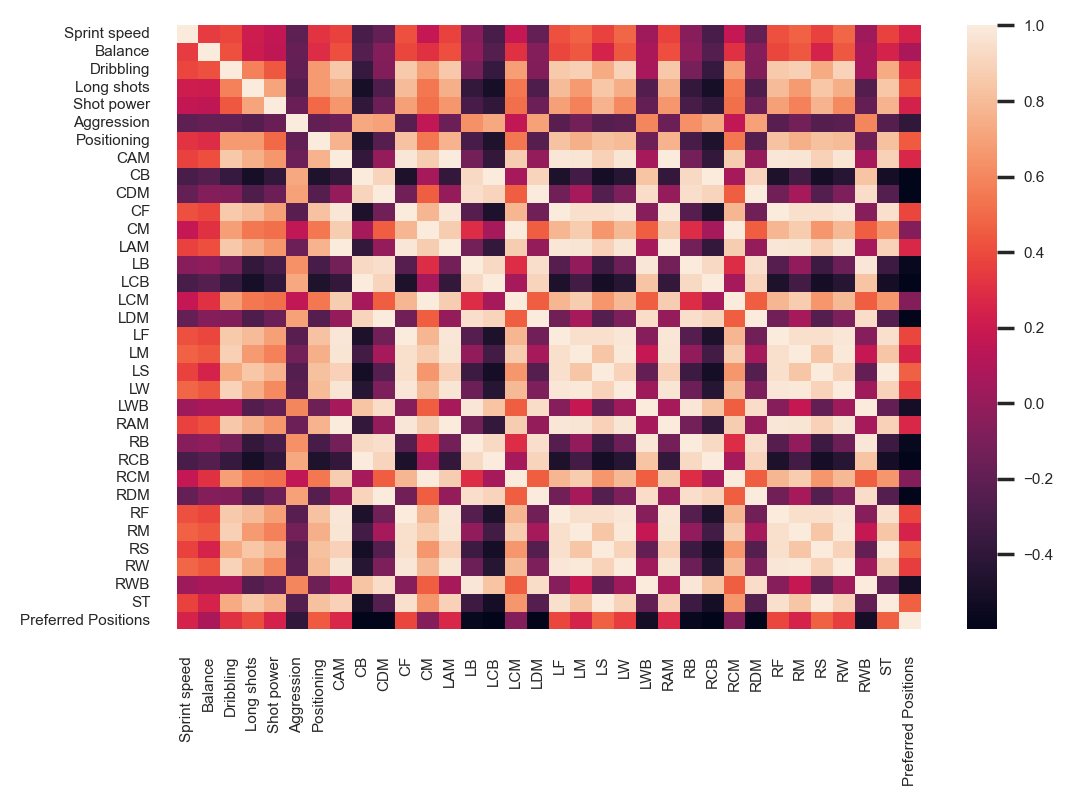

In [145]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

corrDF = subdf.corr()
sns.heatmap(corrDF)
sns.set(font_scale=0.1)
# corrDF


The heatmap shows a couple of interesting insights.
- Positioning, Dribbling, Long Shot, and Shot power are correlated with most stats. However, they show less correlation with Aggression. That is swapped by the position that scores less on Positioning, Dribbling, Long Shot, and Shot power
- Positions that correlate with each other also share similar correlations in the stats.
- Left and Right sides of the same position share the same correlation on the stats

The heatmap shows some correlation but does not show the values of the stats per preferred position. To look further into it, we create Radar charts. These charts can show the stat spread of every position in one plot.

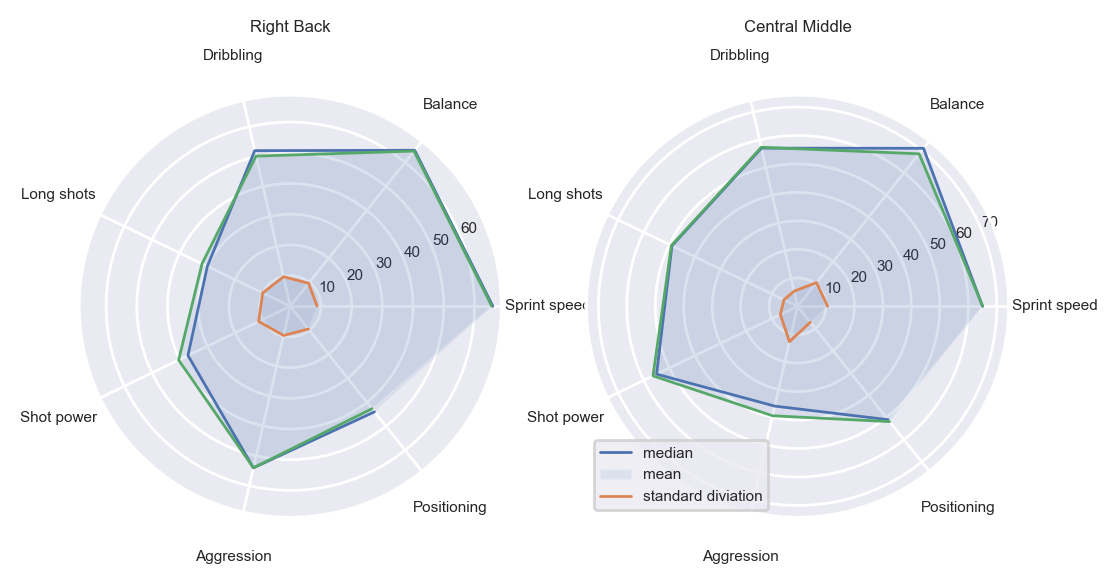

In [146]:
from math import pi
sns.set(font_scale=0.5)

positionGraphs = df.groupby('Preferred Positions').agg({'Sprint speed': ['median', 'std', 'mean'], "Balance": ['median', 'std', 'mean'], "Dribbling": ['median', 'std', 'mean'], "Long shots": ['median', 'std', 'mean'], "Shot power": ['median', 'std', 'mean'],"Aggression": ['median', 'std', 'mean'], 'Positioning': ['median', 'std', 'mean']}).reset_index()
categories = ['Sprint speed','Balance','Dribbling','Long shots','Shot power','Aggression','Positioning']

df_RB = positionGraphs[positionGraphs['Preferred Positions'] == 16]
df_CF = positionGraphs[positionGraphs['Preferred Positions'] == 3]


valuesmedian = []
valuesmax = []
valuesmean = []

for cat in categories:
    valuesmedian.append(df_RB[cat]['median'])
    valuesmax.append(df_RB[cat]['std'])
    valuesmean.append(df_RB[cat]['mean'])


angles = [n / float(7) * 2 * pi for n in range(7)]
angles += angles
angles = angles[0:7]

fig, (ax1, ax2) = plt.subplots(1,2, subplot_kw=dict(projection="polar"))

# plt.xticks(angles, categories)
ax1.plot(angles, valuesmedian, linewidth=1, linestyle='solid', label="median")
ax1.fill(angles, valuesmedian, 'b', alpha=0.1)

ax1.plot(angles, valuesmax, linewidth=1, linestyle='solid', label="std")
ax1.fill(angles, valuesmax, 'b', alpha=0.1)

ax1.plot(angles, valuesmean, linewidth=1, linestyle='solid', label="mean")
ax1.fill(angles, valuesmean, 'b', alpha=0.1)
ax1.set_title('Right Back')

valuesmin = []
valuesmax = []
valuesmean = []
for cat in categories:
    valuesmin.append(df_CF[cat]['median'])
    valuesmax.append(df_CF[cat]['std'])
    valuesmean.append(df_CF[cat]['mean'])

angles2 = [n / float(7) * 2 * pi for n in range(7)]
angles2 += angles2
angles2 = angles2[0:7]

plt.setp([ax1, ax2], xticks=angles, xticklabels=categories)
ax2.plot(angles2, valuesmin, linewidth=1, linestyle='solid', label="group A")
ax2.fill(angles2, valuesmin, 'b', alpha=0.1)

ax2.plot(angles2, valuesmax, linewidth=1, linestyle='solid', label="group A")
ax2.fill(angles2, valuesmax, 'b', alpha=0.1)

ax2.plot(angles2, valuesmean, linewidth=1, linestyle='solid', label="group A")
ax2.fill(angles2, valuesmean, 'b', alpha=0.1)
ax2.set_title('Central Middle')
ax2.legend(['median', 'mean', 'standard deviation'])
plt.show()



The radar chart shows that the right-back players have less power in long shots than central middle position. Also, defending players, as in the right back position, don't have to shoot far forward to push the ball toward the goal. Also, the back position needs more aggression to take the ball from the opponent. In comparison, the middle position is more the receiver and sender of the back and forward positions.<br> The standard deviation is for most stats around 10, which means that there is still many skill difference between players with the same preferred position.

<h1>Predictive</h1>

For the prediction, we will use the K nearest neighbors model. These algorithms look for the distances between a given value and all the other data points. Then look for the closest to classify to that point.
In this model, we use a k=26 for the 26 positions that are possible.

In [147]:
from sklearn.model_selection import train_test_split
import math
x_train, x_test, y_train, y_test = train_test_split(subdf.loc[:,: 'Positioning'], subdf['Preferred Positions'], test_size=0.2)

predicteddf = pd.DataFrame()
knn = KNeighborsClassifier(n_neighbors=26, weights='distance')
knn.fit(x_train,y_train)

predicteddf['pred'] = knn.predict(x_test)


<h1>Evaluation<h1>

In [148]:
accuracy_score(y_test, predicteddf['pred'])

0.4860813704496788

In [149]:
precision_score(y_test,predicteddf['pred'], average='weighted')

c:\Users\jorri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.43288794327365104

In [150]:
recall_score(y_test,predicteddf['pred'], average='weighted')

0.4860813704496788

The calculation of the accuracy and recall scores is around 48% each, and the precision score is approximately 43%. The score calculations mean that the model does not work well. It is less than half of the time correct. And according to the precision, it could be more consistent between predictions. That also reflects the low recall score because the low accuracy means that many true positives are not actual positives.


To get a better view of the results. We change the numerical position back to readable positions. And set everything in a confusion matrix.

In [151]:
predicteddf['pred']
pos_dict = {0: 'CAM',1 : 'CB',2: 'CDM',3: 'CF',4: 'CM',5: 'LAM',6: 'LB',7: 'LCB',8: 'LCM',9 :'LDM',10 :'LF',11 : 'LM',12 :'LS',13 : 'LW',14 : 'LWB',15 : 'RAM',16 : 'RB',17 : 'RCB',18 : 'RCM',19 : 'RDM',20 : 'RF',21: 'RM',22 : 'RS',23 : 'RW', 24 :'RWB',25 :'ST'}
predicteddf.replace(pos_dict, inplace=True)
y_test.replace(pos_dict, inplace=True)

cm= pd.crosstab(y_test.values, predicteddf['pred'].values, rownames=['Position'], colnames=['Predicted Position'], margins=True)
cm

Predicted Position,CAM,CB,CDM,CM,LB,LM,LW,RB,RM,RW,ST,All
Position,,,,,,,,,,,,
CAM,5,0,1,11,0,2,0,0,2,1,8,30
CB,0,65,1,6,2,0,0,2,0,0,0,76
CDM,0,6,7,16,1,0,0,0,0,0,5,35
CF,1,0,0,2,0,0,0,0,0,1,6,10
CM,5,1,6,53,3,2,0,0,2,0,18,90
LB,0,7,0,5,12,0,0,13,0,0,1,38
LM,3,0,0,3,3,2,0,2,5,1,12,31
LW,0,0,0,3,0,2,0,0,0,0,8,13
RB,0,1,1,6,7,1,0,1,1,0,1,19


The results above show that the model often over/underestimated the preferred positions. The number of players per position is less extreme than the predictions showed. For instance, the model predicted that 115 players preferred the 'ST' position, while in reality, almost half of the players preferred that position. Other positions, such as 'CAM', 'RB', and 'RM', are less often predicted than in reality.

<h1>Conclusion</h1>

In this analysis, we predicted the player's preferred position in the Fifa 2018 game. While the data shows some logical correlation, it is not very accurate for a prediction. A possible reason is that the preferred position in the data set differs from the highest-performed position. That may lead to an incorrect result than the performance suggests. Another reason for a lower accuracy is, through time constraints, that we only used seven stats for the prediction. We assume that more leads to better results. 